# Урок 7. Многомерный статистический анализ. Линейная регрессия

## 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])



In [12]:
X = X.reshape(10, 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [13]:
y = y.reshape(10, 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [14]:
X = np.hstack([np.ones((10, 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [15]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

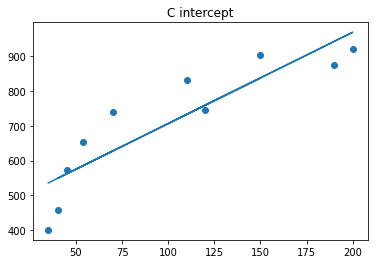

In [18]:
plt.scatter(X[0:, 1:], y)
plt.plot(X[0:, 1:], 444.1773 + X[0:, 1:] * 2.6205)
plt.title("С intercept")
plt.show()

Без intercept

In [16]:
B2 = np.dot(np.linalg.inv(np.dot(X[0:, 1:].T, X[0:, 1:])), X[0:, 1:].T@y)
B2

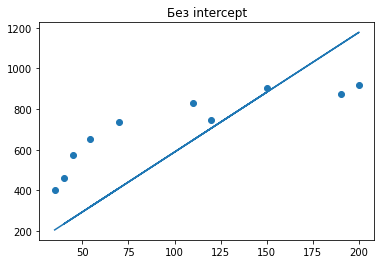

In [19]:
plt.scatter(X[0:, 1:], y)
plt.plot(X[0:, 1:], X[0:, 1:] * 5.8898)
plt.title("Без intercept")
plt.show()

In [20]:
y_hat = 444.1773 + X[0:, 1:] * 2.6205
mse = ((y-y_hat)**2).sum()/10
mse

6470.414222460003

In [21]:
y_hat2 = X[0:, 1:] * 5.8898
mse2 = ((y-y_hat2)**2).sum()/10
mse2

56516.858421464

## 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [22]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n

alpha = 1e-05
alpha

1e-05

In [23]:
B1 = 2
n = 10
for i in range(100):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%10==0:
        print('Iteration={i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration=0, B1=3.07177, mse=165922.46221619015
Iteration=10, B1=5.777582184219032, mse=56690.40805414788
Iteration=20, B1=5.885350158880083, mse=56517.133716763885
Iteration=30, B1=5.889642377102131, mse=56516.85885242827
Iteration=40, B1=5.889813328976504, mse=56516.85841641216
Iteration=50, B1=5.889820137703795, mse=56516.85841572052
Iteration=60, B1=5.8898204088840185, mse=56516.8584157194
Iteration=70, B1=5.889820419684673, mse=56516.85841571941
Iteration=80, B1=5.889820420114845, mse=56516.8584157194
Iteration=90, B1=5.889820420131978, mse=56516.85841571943


## *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [24]:
B0 = 1
B1 = 1
n = 10
alpha = 1e-06
alpha2 = 1e-01

def mse_(B0, B1, y=y, X=X, n=10):
    return np.sum((B0+B1*X-y)**2)/n

for i in range(5000):
    B0 -=alpha2*(2/n)*np.sum((B0+B1*X-y))
    B1 -=alpha*(2/n)*np.sum((B0+B1*X-y)*X)
    if i%500==0:
        print('Iteration={i}, B0={B0}, B1={B1}, mse={mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B0,B1)))

Iteration=0, B0=122.50000000000003, B1=1.1098872, mse=239935.0084313456
Iteration=500, B0=448.89951099840346, B1=2.575469272306189, mse=6477.535890663663
Iteration=1000, B0=444.36391023131205, B1=2.6187583671211594, mse=6470.425316109506
Iteration=1500, B0=444.1847272639029, B1=2.620468541553106, mse=6470.414218523909
Iteration=2000, B0=444.1776484804169, B1=2.6205361035245485, mse=6470.414201203734
Iteration=2500, B0=444.1773688267402, B1=2.6205387726206943, mse=6470.4142011767035
Iteration=3000, B0=444.1773577787714, B1=2.620538878065727, mse=6470.41420117666
Iteration=3500, B0=444.17735734231167, B1=2.6205388822314255, mse=6470.4142011766635
Iteration=4000, B0=444.1773573250689, B1=2.6205388823959956, mse=6470.414201176662
Iteration=4500, B0=444.1773573243879, B1=2.6205388824024953, mse=6470.414201176658
